## Signature reidentification

1. store all the true images from path to a list.
2. store all the false, bad or forged images of signatures to another list.
3. Create a dataframe with target=1 for good images and -1 for bad images

In [47]:
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure
import cv2 as cv

def filter_images(img):
    # Read your image using OpenCV
    #print(img.shape)  # Check the shape of the image

    # Resize the image if needed
    resized_img = cv.resize(img, (194, 90)) 

    # Compute HOG features
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
    return fd,hog_image



#print(fd.shape)

In [48]:
# # Define a function for the filter so that the images can be passed through it and the resultant images vectors can be stored as features

# # takes each image, applies filter, and returns the resultant image
# from skimage.feature import hog
# from skimage import io
# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt
# my_img = None
# def filter_images(image, cell_size=(4, 4), block_size=(2, 2), bins=9):
#     #Load the image using OpenCV and resize it
    
#     #Compute HOG features
#     hog_features, hog_image = hog(
#         image,
#         pixels_per_cell=cell_size,
#         cells_per_block=block_size,
#         orientations=bins,
#         visualize=True,
#         block_norm='L2-Hys'
#     )
#     my_img = hog_image
    
#     # Reshape the HOG features to a single vector
#     hog_vector = np.ravel(hog_features)
    
#     #return hog_vector, hog_image
#     return hog_vector # for now, just return image
# plt.show(my_img)


In [49]:
# 1. storing true images

# reading multiple files from a path in a single shot
import cv2 as cv
import os

# Directory path containing images
directory = 'D://One Drive Data//7th Semester//Digital Image Processing//DIP Project//images//Hgenuine'

# List to store images
images = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".JPG") or filename.endswith(".png") or filename.endswith(".jpg") :  # Check for image extensions
        filepath = os.path.join(directory, filename)
        image = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv.resize(image, (194, 90))
            feature_vector,_ = filter_images(image)
            images.append(feature_vector)
        else:
            print(f"Could not read {filename}")


len(images)



31

In [50]:
# Creating a dataframe to store these images
# all the images are of 128,128 let's flatten it, and store it in datafram

# Considering we are reading all the good images thus target = 1
import numpy as np
import pandas as pd

df1 = pd.DataFrame()
for image in images:
    arr = image.flatten()
    new_row = arr.reshape(arr.size)
    # Convert the new row to a DataFrame
    new_row_df1 = pd.DataFrame([new_row])
    # Concatenate the existing DataFrame with the new row DataFrame
    df1 = pd.concat([df1, new_row_df1], ignore_index=True)


df1.head(11)
    
    
    


,0,1,2,3,4,5,6,7,8,9,...,8270,8271,8272,8273,8274,8275,8276,8277,8278,8279
0,0.320595,0.000000,0.304072,0.135985,0.301016,0.116071,0.060814,0.000000,0.000000,0.320595,...,0.000000,0.126190,0.000000,0.118973,0.000000,0.168254,0.000000,0.000000,0.000000,0.000000
1,0.329154,0.153863,0.228498,0.000000,0.329154,0.000000,0.000000,0.000000,0.000000,0.329154,...,0.000000,0.333184,0.000000,0.000000,0.000000,0.283286,0.160498,0.000000,0.000000,0.000000
2,0.285051,0.039813,0.089680,0.104672,0.285051,0.121605,0.109189,0.019907,0.099546,0.285051,...,0.048491,0.279457,0.000000,0.136146,0.052354,0.233159,0.084928,0.087283,0.000000,0.106510
3,0.300148,0.026728,0.084523,0.026728,0.300148,0.080185,0.016905,0.053457,0.037800,0.300148,...,0.057198,0.290298,0.044333,0.147629,0.044029,0.215618,0.074753,0.048958,0.055927,0.028547
4,0.311086,0.125788,0.067609,0.083859,0.311086,0.118594,0.053037,0.041929,0.000000,0.311086,...,0.000000,0.321269,0.000000,0.321269,0.280844,0.321269,0.281358,0.240822,0.321269,0.000000
5,0.345328,0.000000,0.047682,0.106620,0.345328,0.000000,0.047682,0.000000,0.000000,0.345328,...,0.078128,0.230090,0.021185,0.000000,0.087374,0.293707,0.156948,0.040197,0.042371,0.048310
6,0.064473,0.006379,0.126597,0.124132,0.310297,0.035065,0.028803,0.116941,0.105177,0.164725,...,0.079393,0.333073,0.017996,0.046045,0.212515,0.426110,0.130160,0.065651,0.000000,0.120741
7,0.392678,0.039142,0.033635,0.110943,0.392678,0.000000,0.009476,0.000000,0.000000,0.221120,...,0.085703,0.230794,0.060725,0.104586,0.148398,0.300773,0.067214,0.068173,0.055149,0.149708
8,0.308213,0.008254,0.240927,0.111055,0.308213,0.124320,0.096623,0.021562,0.282502,0.308213,...,0.000000,0.239539,0.023003,0.058193,0.042415,0.325053,0.000000,0.058193,0.000000,0.000000
9,0.284490,0.000000,0.030543,0.091560,0.284490,0.248860,0.041977,0.117059,0.000000,0.284490,...,0.125567,0.278847,0.084063,0.053166,0.092644,0.278847,0.105079,0.079749,0.021016,0.000000


In [51]:
# adding target column in the dataframe

target_column = 1 
df1['target'] = target_column
df1

,0,1,2,3,4,5,6,7,8,9,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,target
0,0.320595,0.000000,0.304072,0.135985,0.301016,0.116071,0.060814,0.000000,0.000000,0.320595,...,0.126190,0.000000,0.118973,0.000000,0.168254,0.000000,0.000000,0.000000,0.000000,1
1,0.329154,0.153863,0.228498,0.000000,0.329154,0.000000,0.000000,0.000000,0.000000,0.329154,...,0.333184,0.000000,0.000000,0.000000,0.283286,0.160498,0.000000,0.000000,0.000000,1
2,0.285051,0.039813,0.089680,0.104672,0.285051,0.121605,0.109189,0.019907,0.099546,0.285051,...,0.279457,0.000000,0.136146,0.052354,0.233159,0.084928,0.087283,0.000000,0.106510,1
3,0.300148,0.026728,0.084523,0.026728,0.300148,0.080185,0.016905,0.053457,0.037800,0.300148,...,0.290298,0.044333,0.147629,0.044029,0.215618,0.074753,0.048958,0.055927,0.028547,1
4,0.311086,0.125788,0.067609,0.083859,0.311086,0.118594,0.053037,0.041929,0.000000,0.311086,...,0.321269,0.000000,0.321269,0.280844,0.321269,0.281358,0.240822,0.321269,0.000000,1
5,0.345328,0.000000,0.047682,0.106620,0.345328,0.000000,0.047682,0.000000,0.000000,0.345328,...,0.230090,0.021185,0.000000,0.087374,0.293707,0.156948,0.040197,0.042371,0.048310,1
6,0.064473,0.006379,0.126597,0.124132,0.310297,0.035065,0.028803,0.116941,0.105177,0.164725,...,0.333073,0.017996,0.046045,0.212515,0.426110,0.130160,0.065651,0.000000,0.120741,1
7,0.392678,0.039142,0.033635,0.110943,0.392678,0.000000,0.009476,0.000000,0.000000,0.221120,...,0.230794,0.060725,0.104586,0.148398,0.300773,0.067214,0.068173,0.055149,0.149708,1
8,0.308213,0.008254,0.240927,0.111055,0.308213,0.124320,0.096623,0.021562,0.282502,0.308213,...,0.239539,0.023003,0.058193,0.042415,0.325053,0.000000,0.058193,0.000000,0.000000,1
9,0.284490,0.000000,0.030543,0.091560,0.284490,0.248860,0.041977,0.117059,0.000000,0.284490,...,0.278847,0.084063,0.053166,0.092644,0.278847,0.105079,0.079749,0.021016,0.000000,1


Storing forged images

In [52]:
# 1. storing forged images

# reading multiple files from a path in a single shot
import cv2 as cv
import os

# Directory path containing images
directory = 'D://One Drive Data//7th Semester//Digital Image Processing//DIP Project//images//Hforged'

# List to store images
images2 = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):  # Check for image extensions
        filepath = os.path.join(directory, filename)
        image = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv.resize(image, (194, 90))
            feature_vector,_ = filter_images(image) # ignoring HOG_image passed by the filter_images function
            images2.append(feature_vector)
        else:
            print(f"Could not read {filename}")


#images list contains all the images now
len(images2)

22

In [53]:
# Creating dataframe of forged images

# Considering we are reading all the good images thus target = 1
import numpy as np
import pandas as pd

df2 = pd.DataFrame()
for image in images2:
    arr = image.flatten()
    new_row = arr.reshape(arr.size)
    #print(new_row.shape)
    # Convert the new row to a DataFrame
    new_row_df2 = pd.DataFrame([new_row])
    # Concatenate the existing DataFrame with the new row DataFrame
    df2 = pd.concat([df2, new_row_df2], ignore_index=True)


df2
    
    
    

,0,1,2,3,4,5,6,7,8,9,...,8270,8271,8272,8273,8274,8275,8276,8277,8278,8279
0,0.234690,0.097377,0.196124,0.183435,0.202814,0.018820,0.047197,0.170999,0.209141,0.234690,...,0.095585,0.221893,0.071752,0.159959,0.211663,0.191421,0.221893,0.110106,0.056560,0.221893
1,0.234690,0.097377,0.196124,0.183435,0.202814,0.018820,0.047197,0.170999,0.209141,0.234690,...,0.095585,0.221893,0.071752,0.159959,0.211663,0.191421,0.221893,0.110106,0.056560,0.221893
2,0.226030,0.040321,0.226030,0.226030,0.112267,0.134036,0.068451,0.172029,0.226030,0.166706,...,0.236192,0.236192,0.106409,0.120341,0.142991,0.166513,0.236192,0.080660,0.093701,0.151119
3,0.229563,0.183186,0.110673,0.138234,0.175856,0.124883,0.082706,0.148753,0.128659,0.229563,...,0.138304,0.219638,0.181139,0.179856,0.148782,0.099766,0.135740,0.093070,0.112368,0.219638
4,0.226258,0.161912,0.085823,0.165747,0.226258,0.098174,0.074001,0.195785,0.141975,0.226258,...,0.097593,0.107408,0.034099,0.144005,0.097110,0.067906,0.071107,0.173775,0.147125,0.019938
5,0.175955,0.098369,0.027970,0.073494,0.233378,0.082044,0.157065,0.233378,0.161322,0.213888,...,0.049031,0.087266,0.066027,0.205126,0.177202,0.119454,0.229964,0.191864,0.159674,0.165079
6,0.231114,0.138466,0.097552,0.000000,0.219934,0.210941,0.231114,0.149754,0.088083,0.231114,...,0.156337,0.218407,0.183330,0.080015,0.108361,0.159572,0.218407,0.100374,0.152346,0.218407
7,0.085815,0.011068,0.010850,0.005185,0.345509,0.345509,0.047792,0.000000,0.002254,0.049227,...,0.120586,0.048656,0.061908,0.147840,0.164314,0.384405,0.079851,0.077028,0.044158,0.084169
8,0.143628,0.162000,0.089902,0.123429,0.164743,0.050397,0.221692,0.187641,0.224459,0.227246,...,0.101064,0.226071,0.178776,0.092066,0.070847,0.090410,0.100013,0.226071,0.184380,0.161027
9,0.231574,0.028607,0.049569,0.066140,0.231574,0.122790,0.078758,0.141641,0.108322,0.231574,...,0.193336,0.085037,0.088068,0.113716,0.070941,0.065422,0.214673,0.089496,0.150445,0.148674


In [54]:
# forged images are classified as -1
target_value = 0

df2['target'] = target_value
df2

,0,1,2,3,4,5,6,7,8,9,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,target
0,0.234690,0.097377,0.196124,0.183435,0.202814,0.018820,0.047197,0.170999,0.209141,0.234690,...,0.221893,0.071752,0.159959,0.211663,0.191421,0.221893,0.110106,0.056560,0.221893,0
1,0.234690,0.097377,0.196124,0.183435,0.202814,0.018820,0.047197,0.170999,0.209141,0.234690,...,0.221893,0.071752,0.159959,0.211663,0.191421,0.221893,0.110106,0.056560,0.221893,0
2,0.226030,0.040321,0.226030,0.226030,0.112267,0.134036,0.068451,0.172029,0.226030,0.166706,...,0.236192,0.106409,0.120341,0.142991,0.166513,0.236192,0.080660,0.093701,0.151119,0
3,0.229563,0.183186,0.110673,0.138234,0.175856,0.124883,0.082706,0.148753,0.128659,0.229563,...,0.219638,0.181139,0.179856,0.148782,0.099766,0.135740,0.093070,0.112368,0.219638,0
4,0.226258,0.161912,0.085823,0.165747,0.226258,0.098174,0.074001,0.195785,0.141975,0.226258,...,0.107408,0.034099,0.144005,0.097110,0.067906,0.071107,0.173775,0.147125,0.019938,0
5,0.175955,0.098369,0.027970,0.073494,0.233378,0.082044,0.157065,0.233378,0.161322,0.213888,...,0.087266,0.066027,0.205126,0.177202,0.119454,0.229964,0.191864,0.159674,0.165079,0
6,0.231114,0.138466,0.097552,0.000000,0.219934,0.210941,0.231114,0.149754,0.088083,0.231114,...,0.218407,0.183330,0.080015,0.108361,0.159572,0.218407,0.100374,0.152346,0.218407,0
7,0.085815,0.011068,0.010850,0.005185,0.345509,0.345509,0.047792,0.000000,0.002254,0.049227,...,0.048656,0.061908,0.147840,0.164314,0.384405,0.079851,0.077028,0.044158,0.084169,0
8,0.143628,0.162000,0.089902,0.123429,0.164743,0.050397,0.221692,0.187641,0.224459,0.227246,...,0.226071,0.178776,0.092066,0.070847,0.090410,0.100013,0.226071,0.184380,0.161027,0
9,0.231574,0.028607,0.049569,0.066140,0.231574,0.122790,0.078758,0.141641,0.108322,0.231574,...,0.085037,0.088068,0.113716,0.070941,0.065422,0.214673,0.089496,0.150445,0.148674,0


In [55]:
df3 = pd.concat([df1, df2], ignore_index=True)

df3

,0,1,2,3,4,5,6,7,8,9,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,target
0,0.320595,0.000000,0.304072,0.135985,0.301016,0.116071,0.060814,0.000000,0.000000,0.320595,...,0.126190,0.000000,0.118973,0.000000,0.168254,0.000000,0.000000,0.000000,0.000000,1
1,0.329154,0.153863,0.228498,0.000000,0.329154,0.000000,0.000000,0.000000,0.000000,0.329154,...,0.333184,0.000000,0.000000,0.000000,0.283286,0.160498,0.000000,0.000000,0.000000,1
2,0.285051,0.039813,0.089680,0.104672,0.285051,0.121605,0.109189,0.019907,0.099546,0.285051,...,0.279457,0.000000,0.136146,0.052354,0.233159,0.084928,0.087283,0.000000,0.106510,1
3,0.300148,0.026728,0.084523,0.026728,0.300148,0.080185,0.016905,0.053457,0.037800,0.300148,...,0.290298,0.044333,0.147629,0.044029,0.215618,0.074753,0.048958,0.055927,0.028547,1
4,0.311086,0.125788,0.067609,0.083859,0.311086,0.118594,0.053037,0.041929,0.000000,0.311086,...,0.321269,0.000000,0.321269,0.280844,0.321269,0.281358,0.240822,0.321269,0.000000,1
5,0.345328,0.000000,0.047682,0.106620,0.345328,0.000000,0.047682,0.000000,0.000000,0.345328,...,0.230090,0.021185,0.000000,0.087374,0.293707,0.156948,0.040197,0.042371,0.048310,1
6,0.064473,0.006379,0.126597,0.124132,0.310297,0.035065,0.028803,0.116941,0.105177,0.164725,...,0.333073,0.017996,0.046045,0.212515,0.426110,0.130160,0.065651,0.000000,0.120741,1
7,0.392678,0.039142,0.033635,0.110943,0.392678,0.000000,0.009476,0.000000,0.000000,0.221120,...,0.230794,0.060725,0.104586,0.148398,0.300773,0.067214,0.068173,0.055149,0.149708,1
8,0.308213,0.008254,0.240927,0.111055,0.308213,0.124320,0.096623,0.021562,0.282502,0.308213,...,0.239539,0.023003,0.058193,0.042415,0.325053,0.000000,0.058193,0.000000,0.000000,1
9,0.284490,0.000000,0.030543,0.091560,0.284490,0.248860,0.041977,0.117059,0.000000,0.284490,...,0.278847,0.084063,0.053166,0.092644,0.278847,0.105079,0.079749,0.021016,0.000000,1


In [56]:
# Passing the model to the SVM for predictions
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

#df = df3
df3.columns = df3.columns.astype(str)
x = df3.iloc[:,:-1] # all features excluding target value
y = df3['target']

x_train, x_test , y_train, y_test = train_test_split(x, y,test_size = 0.3 , random_state = 42)


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'x_train', 'x_test', 'y_train', 'y_test' are already defined

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create the Support Vector Machine classifier
svm = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier using scaled features
svm.fit(x_train_scaled, y_train)

# Make predictions on the scaled test set
predictions = svm.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



[1]


d:\One Drive Data\7th Semester\Digital Image Processing\DIP Project\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(-0.5, 193.5, 89.5, -0.5)

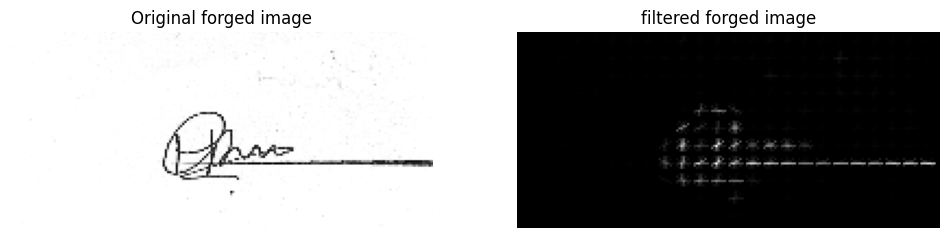

In [58]:
# testing forged images predictions

img_forged  = cv.imread('D://One Drive Data//7th Semester//Digital Image Processing//DIP Project//images//Hgenuine//IMG_6250.JPG', cv.IMREAD_GRAYSCALE)

# resizing the image for which the model is trained
img_forged = cv.resize(img_forged, (194, 90))

# passing the image through the filter
img_vector, imgf = filter_images(img_forged)


#print(fil_img.shape) # shows that fil_img is a column vector
img_array = np.array(img_vector).reshape(1, -1)  # Flatten the image to a 1D array
#print(img_array.shape) # now it has been transformed to row vector which is required

img_scaled = scaler.transform(img_array,)
# Make predictions using the SVM model

prediction = svm.predict(img_scaled)
print(prediction)
# svm.predict(fil_img)


plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Original forged image")
plt.imshow(img_forged,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("filtered forged image")
plt.imshow(imgf,cmap='gray')
plt.axis('off')



d:\One Drive Data\7th Semester\Digital Image Processing\DIP Project\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1]


(-0.5, 193.5, 89.5, -0.5)

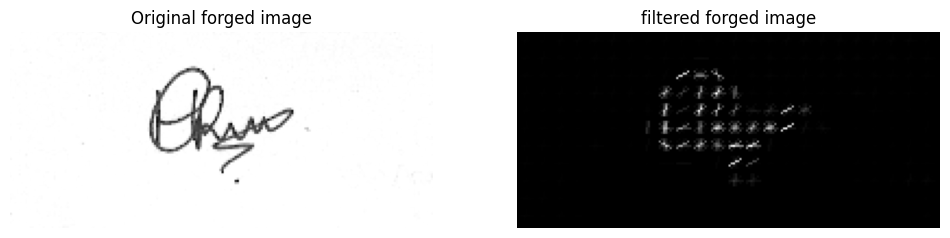

In [59]:
# testing genuine images

img_forged  = cv.imread('D://One Drive Data//7th Semester//Digital Image Processing//DIP Project//images//Hgenuine//IMG_6253.JPG', cv.IMREAD_GRAYSCALE)

# resizing the image for which the model is trained
img_forged = cv.resize(img_forged, (194, 90))

# passing the image through the filter
img_vector, imgf = filter_images(img_forged)


#print(fil_img.shape) # shows that fil_img is a column vector
img_array = np.array(img_vector).reshape(1, -1)  # Flatten the image to a 1D array
#print(img_array.shape) # now it has been transformed to row vector which is required

img_scaled = scaler.transform(img_array,)
# Make predictions using the SVM model
prediction = svm.predict(img_scaled)
print(prediction)
# svm.predict(fil_img)


plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title("Original forged image")
plt.imshow(img_forged,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("filtered forged image")
plt.imshow(imgf,cmap='gray')
plt.axis('off')



In [60]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Create the Support Vector Machine classifier
svm = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier
svm.fit(x_train, y_train)

# Make predictions
predictions = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



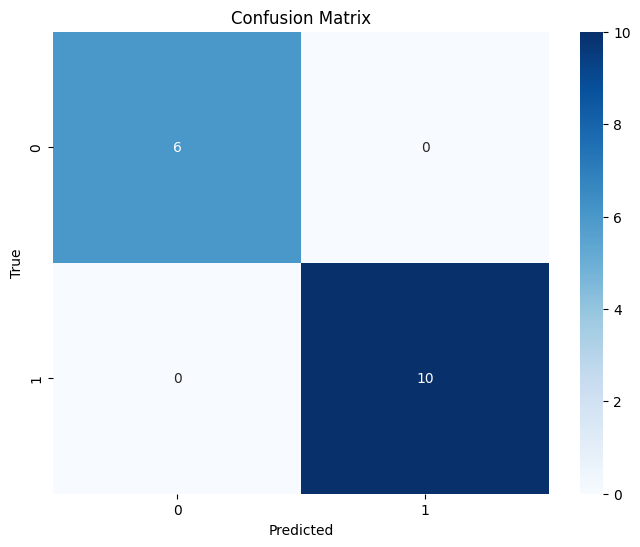

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predictions)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




[True Negatives (TN)] [False Positives (FP)]<br>
[False Negatives (FN)] [True Positives (TP)]

In [62]:
df3.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,target
0,0.320595,0.000000,0.304072,0.135985,0.301016,0.116071,0.060814,0.000000,0.000000,0.320595,...,0.126190,0.000000,0.118973,0.000000,0.168254,0.000000,0.000000,0.000000,0.000000,1
1,0.329154,0.153863,0.228498,0.000000,0.329154,0.000000,0.000000,0.000000,0.000000,0.329154,...,0.333184,0.000000,0.000000,0.000000,0.283286,0.160498,0.000000,0.000000,0.000000,1
2,0.285051,0.039813,0.089680,0.104672,0.285051,0.121605,0.109189,0.019907,0.099546,0.285051,...,0.279457,0.000000,0.136146,0.052354,0.233159,0.084928,0.087283,0.000000,0.106510,1
3,0.300148,0.026728,0.084523,0.026728,0.300148,0.080185,0.016905,0.053457,0.037800,0.300148,...,0.290298,0.044333,0.147629,0.044029,0.215618,0.074753,0.048958,0.055927,0.028547,1
4,0.311086,0.125788,0.067609,0.083859,0.311086,0.118594,0.053037,0.041929,0.000000,0.311086,...,0.321269,0.000000,0.321269,0.280844,0.321269,0.281358,0.240822,0.321269,0.000000,1
5,0.345328,0.000000,0.047682,0.106620,0.345328,0.000000,0.047682,0.000000,0.000000,0.345328,...,0.230090,0.021185,0.000000,0.087374,0.293707,0.156948,0.040197,0.042371,0.048310,1
6,0.064473,0.006379,0.126597,0.124132,0.310297,0.035065,0.028803,0.116941,0.105177,0.164725,...,0.333073,0.017996,0.046045,0.212515,0.426110,0.130160,0.065651,0.000000,0.120741,1
7,0.392678,0.039142,0.033635,0.110943,0.392678,0.000000,0.009476,0.000000,0.000000,0.221120,...,0.230794,0.060725,0.104586,0.148398,0.300773,0.067214,0.068173,0.055149,0.149708,1
8,0.308213,0.008254,0.240927,0.111055,0.308213,0.124320,0.096623,0.021562,0.282502,0.308213,...,0.239539,0.023003,0.058193,0.042415,0.325053,0.000000,0.058193,0.000000,0.000000,1
9,0.284490,0.000000,0.030543,0.091560,0.284490,0.248860,0.041977,0.117059,0.000000,0.284490,...,0.278847,0.084063,0.053166,0.092644,0.278847,0.105079,0.079749,0.021016,0.000000,1


In [63]:
# # Passing the model to the SVM for predictions
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# df3.columns = df3.columns.astype(str)
# x = df3.iloc[:,:-1] # all features excluding target value
# y = df3['target']

# x_train, x_test , y_train, y_test = train_test_split(x, y,test_size = 0.2 , random_state = 42)


In [64]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,8271,8272,8273,8274,8275,8276,8277,8278,8279,target
0,0.320595,0.000000,0.304072,0.135985,0.301016,0.116071,0.060814,0.000000,0.000000,0.320595,...,0.126190,0.000000,0.118973,0.000000,0.168254,0.000000,0.000000,0.000000,0.000000,1
1,0.329154,0.153863,0.228498,0.000000,0.329154,0.000000,0.000000,0.000000,0.000000,0.329154,...,0.333184,0.000000,0.000000,0.000000,0.283286,0.160498,0.000000,0.000000,0.000000,1
2,0.285051,0.039813,0.089680,0.104672,0.285051,0.121605,0.109189,0.019907,0.099546,0.285051,...,0.279457,0.000000,0.136146,0.052354,0.233159,0.084928,0.087283,0.000000,0.106510,1
3,0.300148,0.026728,0.084523,0.026728,0.300148,0.080185,0.016905,0.053457,0.037800,0.300148,...,0.290298,0.044333,0.147629,0.044029,0.215618,0.074753,0.048958,0.055927,0.028547,1
4,0.311086,0.125788,0.067609,0.083859,0.311086,0.118594,0.053037,0.041929,0.000000,0.311086,...,0.321269,0.000000,0.321269,0.280844,0.321269,0.281358,0.240822,0.321269,0.000000,1


In [65]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Counting the features and examples in the DataFrame
num_features = df3.shape[1] - 1  # Excluding the target column
num_examples = df3.shape[0]

# Separating features and target variable
X = df3.iloc[:, :-1]  # Features
y = df3.iloc[:, -1]   # Target variable

# Applying PCA with 80% energy
pca = PCA(n_components=0.5)  # Retain 80% energy
X_pca = pca.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Applying Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Predicting on the test set
y_pred = svc.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVC on the test set: {accuracy:.2f}")


Accuracy of SVC on the test set: 1.00


In [66]:
X_pca.shape

(53, 13)

In [67]:
# Performing scalling of the training data
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_tr = s.fit_transform(x_train)
x_test_tr =  s.transform(x_test)

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_tr)
x_test_pca = pca.transform(x_test_tr)

In [69]:
eigenvectors = pd.DataFrame(x_train_pca)
round(eigenvectors.head(20) )
eigenvectors.shape

(37, 37)

In [70]:
eigenvalues = list(np.round(pca.explained_variance_ ,decimals=4))
print(f"The eigenvalues for covariance matrix are {eigenvalues}")

The eigenvalues for covariance matrix are [902.3978, 662.1376, 501.0119, 385.5628, 366.372, 303.2537, 271.8486, 257.9231, 249.2002, 248.1422, 230.0147, 225.755, 219.8746, 213.7966, 199.2635, 191.6445, 189.7383, 186.4752, 182.7445, 178.6548, 177.0689, 175.9525, 167.3161, 162.3661, 157.9763, 155.8427, 152.5765, 146.5778, 142.5604, 139.1933, 135.1962, 131.7577, 129.2478, 127.0613, 125.0636, 118.4312, 0.0]


In [71]:
# normalized eigenvalues
a = np.round(pca.explained_variance_ratio_,2)
print(a)
np.sum(a) #sum = 1

[0.11 0.08 0.06 0.05 0.04 0.04 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.  ]


1.03

In [72]:
pca.components_.shape

(37, 8280)

In [73]:
# pca_data = pd.DataFrame(abs(pca.components_[:4]), columns= df3.columns[:-1],index = ['pca component 1','pca component 2','pca component 3','pca component 4'])

In [74]:
pca_data

NameError: name 'pca_data' is not defined

In [ ]:
transformed_data.shape

(37, 37)

In [ ]:
# import seaborn as sns
# # Pairplot to visualize pairwise relationships in the dataset

# sns.pairplot(final_datas, hue='target', palette='viridis')
# plt.show()

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Step 1: Load dataset (example: digits dataset)
data = df3
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Step 3: Preprocess the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply PCA for dimensionality reduction
n_components = 2  # Number of components to keep
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Step 5: Create and train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', C=0.9, gamma='scale', random_state=42)
svm_model.fit(X_train_pca, y_train)

# Step 6: Make predictions using the trained model
y_pred = svm_model.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.4f}")





Accuracy of the SVM model: 0.6579


In [ ]:
import numpy as np
import pandas as pd

# Creating a DataFrame for the transformed features
# Replace this with your actual transformed data obtained after PCA
# X_train_pca and X_test_pca are assumed to be the transformed features after PCA

# Let's say you have 20 PCA components in this example
num_components = 2

# Generating synthetic data as an example (Replace this with your actual transformed data)
X_train_pca = np.random.rand(100, num_components)  # Example synthetic data
X_test_pca = np.random.rand(25, num_components)  # Example synthetic data

# Creating DataFrames for the transformed features
columns = [f"PCA_{i+1}" for i in range(num_components)]  # Column names for PCA components
X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=columns)
X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=columns)

# Optionally, you can add target labels if available
# Assuming y_train and y_test are the target labels corresponding to X_train_pca and X_test_pca
# Replace this with your actual target labels

# Adding target labels to the DataFrames
X_train_pca_df['Target'] = y_train
X_test_pca_df['Target'] = y_test

# Displaying the new datasets created from PCA-transformed features
print("New dataset for training after PCA:")
print(X_train_pca_df.head())

print("\nNew dataset for testing after PCA:")
print(X_test_pca_df.head())


New dataset for training after PCA:
      PCA_1     PCA_2  Target
0  0.218927  0.767309     NaN
1  0.950385  0.477790     NaN
2  0.963610  0.344160     NaN
3  0.442656  0.289099     NaN
4  0.653538  0.070583     NaN

New dataset for testing after PCA:
      PCA_1     PCA_2  Target
0  0.809128  0.488178     1.0
1  0.117504  0.358758     1.0
2  0.848433  0.785632     1.0
3  0.505570  0.572595     1.0
4  0.695799  0.883314     1.0


In [ ]:
pca.explained_variance_

array([1207.86038823,  939.40384669])

In [ ]:
len(pca.components_)

2